# Linear regression analysis of bike data from kaggle

In this notebook I am fitting a linear regression to the bike data from this popular kaggle data set
https://www.kaggle.com/c/bike-sharing-demand

Here I will look at the data a bit and then perform a linear regression and discuss the results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv('Bike_train.csv', parse_dates=['datetime'], index_col='datetime',date_parser=dateparse)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB
None


In [5]:
data['Hour'] = data.index.hour
data['Month'] = data.index.month
data['day of week'] = data.index.dayofweek

print(data.head())
print('\n')
print(data.info())

                     season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  Hour  \
datetime                                                                    
2011-01-01 00:00:00        81        0.0       3          13     16     0   
2011-01-01 01:00:00        80        0.0       8          32     40     1   
2011-01-01 02:00:00        80        0.0       5          27     32     2   
2011-01-01 03:00:00        75        0.0       3          10     13     3   
2011-01-01 0

casual + registered = count 

I suspect that the behavior of casual users is different from the behavior of registered users. We should look into that.

Now let's take a look at the other data and switch some of the int64 into categorical data

(array([  15.,  285.,  717.,  689.,  725., 1028., 1857., 2947., 2016.,
         607.]),
 array([0.        , 0.6787845 , 1.357569  , 2.03635349, 2.71513799,
        3.39392249, 4.07270699, 4.75149149, 5.43027599, 6.10906048,
        6.78784498]),
 <a list of 10 Patch objects>)

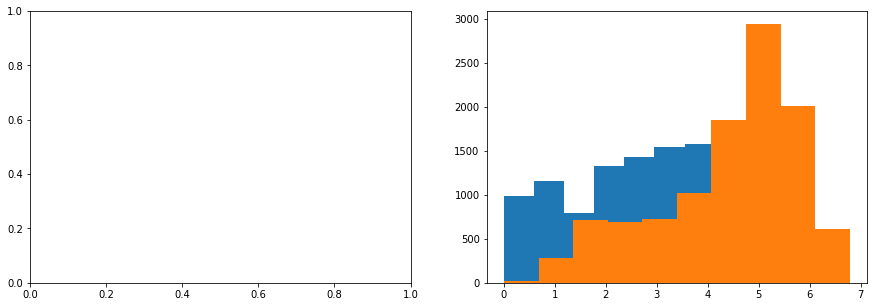

In [100]:

fig, ax = plt.subplots(1,2, figsize = (15,5))
plt.hist(np.log(data['casual']+1),)
plt.hist(np.log(data['registered']+1))


Text(0,0.5,'holiday')

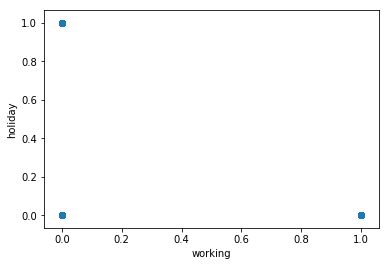

In [76]:
plt.scatter(data['workingday'],data['holiday'])
plt.xlabel('working')
plt.ylabel('holiday')

So holiday is a redundant variable. let's drop it. 

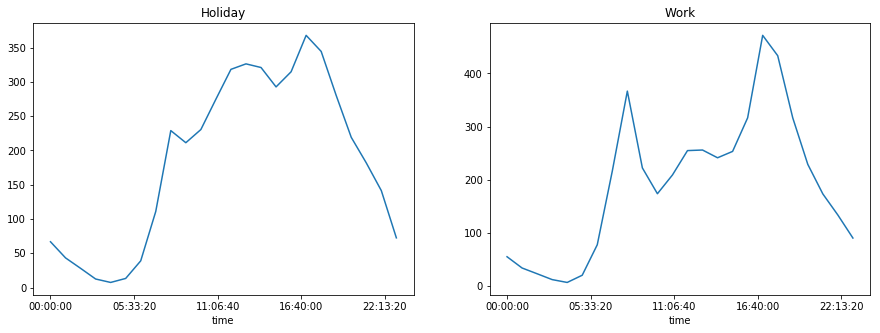

In [70]:
h = np.where(data['holiday'] ==1, 'Holiday', 'Work')
by_time = data['count'].groupby([h, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
by_time.loc['Holiday'].plot(ax=ax[0], title='Holiday')
by_time.loc['Work'].plot(ax=ax[1], title='Work')

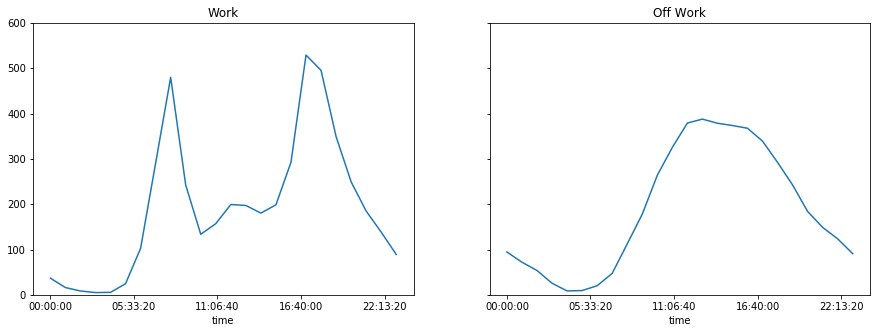

In [86]:
w = np.where(data['workingday'] ==1, 'work', 'off work')
by_time = data['count'].groupby([w, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(15, 5),sharey=True)
plt.ylim([0,600])
by_time.loc['work'].plot(ax=ax[0], title='Work')
by_time.loc['off work'].plot(ax=ax[1], title='Off Work')

C:\Users\LSMdell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


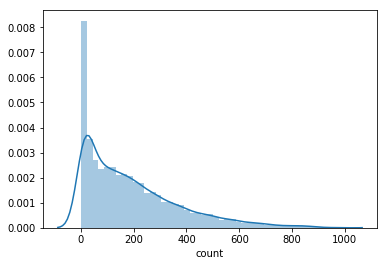

In [80]:
 sns.distplot(data['count'])

this data looks bimodal to me. let's see if we can separate the working days from the non-working days and see if it helps

C:\Users\LSMdell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


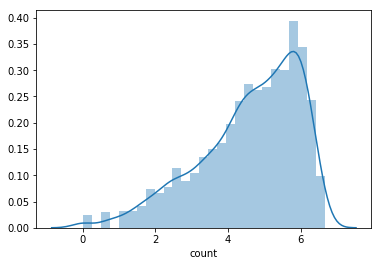

In [88]:
off_data = data[data['workingday']==0]
on_data = data[data['workingday']==1]
sns.distplot(np.log(off_data['count']))
#sns.distplot(on_data['count'])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['count','casual','registered'],axis=1), data['count'], test_size=0.33, random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-7.05253612  5.33282004  5.57144509 -0.07094449  2.44314423  4.28524476
 -2.36533903  0.24209554  7.68927973 10.102124    1.60479063]


Text(0,0.5,'Predicted Y')

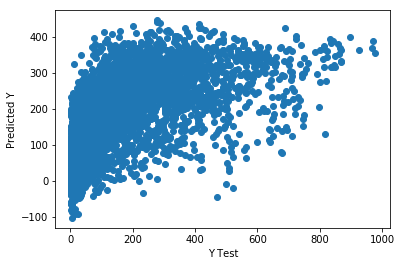

In [38]:
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [39]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 108.02972067275213
MSE: 21345.361140703248
RMSE: 146.10051724995105


C:\Users\LSMdell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


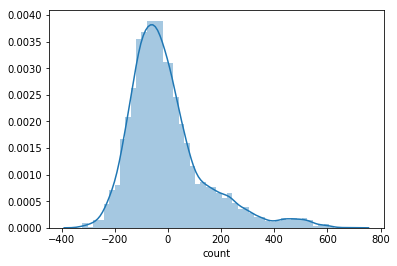

In [40]:
sns.distplot((y_test-predictions),bins=50);

In [41]:
coeffecients = pd.DataFrame(lm.coef_,data.drop(['count','casual','registered'],axis=1).columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
season,-7.052536
holiday,5.332820
workingday,5.571445
weather,-0.070944
temp,2.443144
atemp,4.285245
humidity,-2.365339
windspeed,0.242096
Hour,7.689280
Month,10.102124


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[data['day of week']==5].drop(['count','casual','registered','day of week'],axis=1), data[data['day of week']==5]['count'], test_size=0.33, random_state=101)

well that result is not so great. Let's try to break the data up into sub-units. 


Coefficients: 
 [-3.32024690e+01  6.75015599e-14 -5.86197757e-14  2.79950161e+01
 -7.14827729e+00  1.48303660e+01 -3.92917663e+00 -7.19283171e-01
  5.95244003e+00  1.71712320e+01]


Text(0,0.5,'Predicted Y')

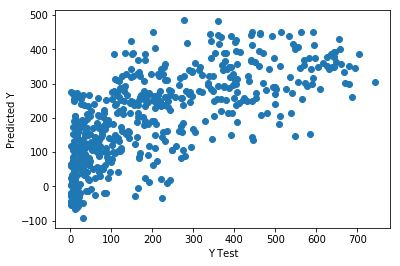

In [60]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', lm.coef_)
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [62]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 109.42033065540231
MSE: 19596.689411528387
RMSE: 139.98817597043112


In [64]:
coeffecients = pd.DataFrame(lm.coef_,data.drop(['count','casual','registered','day of week'],axis=1).columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
season,-3.320247e+01
holiday,6.750156e-14
workingday,-5.861978e-14
weather,2.799502e+01
temp,-7.148277e+00
atemp,1.483037e+01
humidity,-3.929177e+00
windspeed,-7.192832e-01
Hour,5.952440e+00
Month,1.717123e+01


In [50]:
by_weekday = data.groupby('day of week', axis=1)

In [52]:
by_weekday

Let's go retrieve the csv files I made from the longitudinal analysis:

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
data_reg = pd.read_csv('registered_stationary.csv', parse_dates=['datetime'], index_col='datetime',date_parser=dateparse)
data_cas = pd.read_csv('casual_stationary.csv', parse_dates=['datetime'], index_col='datetime',date_parser=dateparse)

print(data_reg.info())
print(data_cas.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 4 columns):
data        10886 non-null int64
trend       10886 non-null float64
seasonal    10886 non-null float64
residual    10886 non-null float64
dtypes: float64(3), int64(1)
memory usage: 425.2 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 4 columns):
data        10886 non-null int64
trend       10886 non-null float64
seasonal    10886 non-null float64
residual    10886 non-null float64
dtypes: float64(3), int64(1)
memory usage: 425.2 KB
None
